### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Calculate the percentage of students who passed math **and** reading (% Overall Passing)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np


# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
#print(school_data_complete.head())
#print(school_data)
totalSchools=len(school_data_complete["school_name"].unique())
totalStudents=len(school_data_complete["Student ID"].unique())
totalBudget=school_data["budget"].sum()
averageMathScore=school_data_complete["math_score"].mean()
averageReadingScore=school_data_complete["reading_score"].mean()
percentPassingMath=100*school_data_complete[school_data_complete["math_score"]>= 70]["Student ID"].count()/len(school_data_complete["Student ID"].unique())
percentPassingReading=100*school_data_complete[school_data_complete["reading_score"]>= 70]["Student ID"].count()/len(school_data_complete["Student ID"].unique())
percentOverallPassing=100*school_data_complete[(school_data_complete["math_score"]>= 70) & (school_data_complete["reading_score"]>= 70)]["Student ID"].count()/len(school_data_complete["Student ID"].unique())

summary= {"Total Schools":[totalSchools],
          "Total Students":[totalStudents],
          "Total Budget":[totalBudget],
          "Average Math Score": [averageMathScore],
          "Average Reading Score": [averageReadingScore],
          "% Passing Math": [percentPassingMath],
          "% Passing Reading": [percentPassingReading],
          "% Overall Passing": [percentOverallPassing]}

summary_df=pd.DataFrame(summary)
summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * % Overall Passing (The percentage of students that passed math **and** reading.)
  
* Create a dataframe to hold the above results

In [2]:

grouped_schools_summary_final_df={}
math_conditions = [
    (school_data_complete['math_score'] < 70),
    (school_data_complete['math_score'] >=70) 
    ]
reading_conditions = [
    (school_data_complete['reading_score'] < 70),
    (school_data_complete['reading_score'] >=70) ]
overall_conditions = [
    (school_data_complete['reading_score'] < 70) | (school_data_complete['math_score'] < 70) ,
    (school_data_complete['reading_score'] >=70) &  (school_data_complete['math_score'] >= 70)]

values=[0, 100]
school_data_complete["% Passing Math Score"]=np.select(math_conditions,values)
school_data_complete["% Passing Reading Score"]=np.select(reading_conditions,values)
school_data_complete["% Passing Overall Score"]=np.select(overall_conditions,values)
#print(school_data_complete)
grouped_schools_summary_final_df={}
math_conditions = [
    (school_data_complete['math_score'] < 70),
    (school_data_complete['math_score'] >=70) 
    ]
reading_conditions = [
    (school_data_complete['reading_score'] < 70),
    (school_data_complete['reading_score'] >=70) ]
overall_conditions = [
    (school_data_complete['reading_score'] < 70) | (school_data_complete['math_score'] < 70) ,
    (school_data_complete['reading_score'] >=70) &  (school_data_complete['math_score'] >= 70)]

values=[0, 100]
school_data_complete["% Passing Math Score"]=np.select(math_conditions,values)
school_data_complete["% Passing Reading Score"]=np.select(reading_conditions,values)
school_data_complete["% Passing Overall Score"]=np.select(overall_conditions,values)
#print(school_data_complete)
#school_data_complete.head()
grouped_schools_df = school_data_complete.groupby("school_name")
#grouped_schools_df = school_data_complete.set_index("school_name")
#print(school_data_complete)
#print(grouped_schools_df)
grouped_schools_summary=grouped_schools_df.mean()
#grouped_schools_summary
grouped_schools_summary_final = grouped_schools_summary.loc[:,["School ID",
                                                                "size", 
                                                                "reading_score", 
                                                                "math_score",
                                                                "% Passing Math Score",
                                                                "% Passing Reading Score",
                                                                "% Passing Overall Score",
                                                                "budget"]]

grouped_schools_summary_final_df=pd.DataFrame(grouped_schools_summary_final)
grouped_schools_summary_final_df["Budget per student"]=grouped_schools_summary_final_df["budget"]/grouped_schools_summary_final_df["size"]

grouped_schools_summary_final_df= grouped_schools_summary_final_df.sort_values("School ID")
grouped_schools_summary_final_df["School Type"]= school_data["type"].to_numpy()

grouped_schools_summary_final_df.rename(columns={"size":"Total Students","budget":"Total School Budget","reading_score":"Average Reading Score","math_score":"Average Math Score"},inplace=True)
grouped_schools_summary_final_df.drop(["School ID"], axis=1,inplace=True)
#grouped_schools_summary_final_df
grouped_schools_summary_final_df=grouped_schools_summary_final_df[["School Type","Total Students","Total School Budget","Budget per student","Average Reading Score","Average Math Score","% Passing Math Score","% Passing Reading Score","% Passing Overall Score"]]
#grouped_schools_summary_final_df
def format(x):
    return "${:.1f}K".format(x/1000)
def format1(x):
    return "${:.1f}".format(x)
def format2(x):
    return "{:.2f}%".format(x)
def format3(x):
    return "{:.0f}".format(x)
grouped_schools_summary_final_df1=grouped_schools_summary_final_df
#grouped_schools_summary_final_df1["Total School Budget"]=grouped_schools_summary_final_df1["Total School Budget"].apply(format)
#grouped_schools_summary_final_df1["Budget per student"]=grouped_schools_summary_final_df1["Budget per student"].apply(format1)
#grouped_schools_summary_final_df1["Average Reading Score"]=grouped_schools_summary_final_df1["Average Reading Score"].apply(format2)
#grouped_schools_summary_final_df1["Average Math Score"]=grouped_schools_summary_final_df1["Average Math Score"].apply(format2)
#grouped_schools_summary_final_df1["% Passing Math Score"]=grouped_schools_summary_final_df1["% Passing Math Score"].apply(format2)
#grouped_schools_summary_final_df1["% Passing Reading Score"]=grouped_schools_summary_final_df1["% Passing Reading Score"].apply(format2)
#grouped_schools_summary_final_df1["% Passing Overall Score"]=grouped_schools_summary_final_df1["% Passing Overall Score"].apply(format2)
#grouped_schools_summary_final_df1["Total Students"]=grouped_schools_summary_final_df1["Total Students"].apply(format3)
grouped_schools_summary_final_df

,School Type,Total Students,Total School Budget,Budget per student,Average Reading Score,Average Math Score,% Passing Math Score,% Passing Reading Score,% Passing Overall Score
school_name,,,,,,,,,
Huang High School,District,2917.0,1910635.0,655.0,81.182722,76.629414,65.683922,81.316421,53.513884
Figueroa High School,District,2949.0,1884411.0,639.0,81.158020,76.711767,65.988471,80.739234,53.204476
Shelton High School,Charter,1761.0,1056600.0,600.0,83.725724,83.359455,93.867121,95.854628,89.892107
Hernandez High School,District,4635.0,3022020.0,652.0,80.934412,77.289752,66.752967,80.862999,53.527508
Griffin High School,Charter,1468.0,917500.0,625.0,83.816757,83.351499,93.392371,97.138965,90.599455
Wilson High School,Charter,2283.0,1319574.0,578.0,83.989488,83.274201,93.867718,96.539641,90.582567
Cabrera High School,Charter,1858.0,1081356.0,582.0,83.975780,83.061895,94.133477,97.039828,91.334769
Bailey High School,District,4976.0,3124928.0,628.0,81.033963,77.048432,66.680064,81.933280,54.642283
Holden High School,Charter,427.0,248087.0,581.0,83.814988,83.803279,92.505855,96.252927,89.227166


## Top Performing Schools (By % Overall Passing)
grouped_schools_summary_final_df


* Sort and display the top five performing schools by % overall passing.

In [3]:
grouped_schools_summary_final_df.sort_values("% Passing Overall Score",ascending=False)[0:5]

,School Type,Total Students,Total School Budget,Budget per student,Average Reading Score,Average Math Score,% Passing Math Score,% Passing Reading Score,% Passing Overall Score
school_name,,,,,,,,,
Cabrera High School,Charter,1858.0,1081356.0,582.0,83.975780,83.061895,94.133477,97.039828,91.334769
Thomas High School,Charter,1635.0,1043130.0,638.0,83.848930,83.418349,93.272171,97.308869,90.948012
Griffin High School,Charter,1468.0,917500.0,625.0,83.816757,83.351499,93.392371,97.138965,90.599455
Wilson High School,Charter,2283.0,1319574.0,578.0,83.989488,83.274201,93.867718,96.539641,90.582567
Pena High School,Charter,962.0,585858.0,609.0,84.044699,83.839917,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

* Sort and display the five worst-performing schools by % overall passing.

In [4]:
grouped_schools_summary_final_df.sort_values("% Passing Overall Score",ascending=True)[0:5]

,School Type,Total Students,Total School Budget,Budget per student,Average Reading Score,Average Math Score,% Passing Math Score,% Passing Reading Score,% Passing Overall Score
school_name,,,,,,,,,
Rodriguez High School,District,3999.0,2547363.0,637.0,80.744686,76.842711,66.366592,80.220055,52.988247
Figueroa High School,District,2949.0,1884411.0,639.0,81.158020,76.711767,65.988471,80.739234,53.204476
Huang High School,District,2917.0,1910635.0,655.0,81.182722,76.629414,65.683922,81.316421,53.513884
Hernandez High School,District,4635.0,3022020.0,652.0,80.934412,77.289752,66.752967,80.862999,53.527508
Johnson High School,District,4761.0,3094650.0,650.0,80.966394,77.072464,66.057551,81.222432,53.539172


## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [5]:



Nineth_series=school_data_complete[school_data_complete['grade']=="9th"]
Tenth_series=school_data_complete[school_data_complete['grade']=="10th"]
Eleventh_series=school_data_complete[school_data_complete['grade']=="11th"]
Twelvth_series=school_data_complete[school_data_complete['grade']=="12th"]
Nineth_series = Nineth_series.groupby("school_name")
Tenth_series = Tenth_series.groupby("school_name")
Eleventh_series = Eleventh_series.groupby("school_name")
Twelvth_series = Twelvth_series.groupby("school_name")

Nineth_series = Nineth_series.mean()
Tenth_series = Tenth_series.mean()
Eleventh_series = Eleventh_series.mean()
Twelvth_series = Twelvth_series.mean()

Nineth_math_series= pd.Series(Nineth_series["math_score"])
Tenth_math_series= pd.Series(Tenth_series["math_score"])
Eleventh_math_series= pd.Series(Eleventh_series["math_score"])
Twelvth_math_series= pd.Series(Twelvth_series["math_score"])
allGradesMath = pd.DataFrame(columns = ['9th', '10th', '11th', '12th'])
allGradesMath['9th'] = Nineth_math_series
allGradesMath['10th'] = Tenth_math_series
allGradesMath['11th'] = Eleventh_math_series
allGradesMath['12th'] = Twelvth_math_series
allGradesMath

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [6]:

#school_data_complete.to_excel("output.xlsx",
#             sheet_name='Sheet_name_1')  

Nineth_reading_series= pd.Series(Nineth_series["reading_score"])
Tenth_reading_series= pd.Series(Tenth_series["reading_score"])
Eleventh_reading_series= pd.Series(Eleventh_series["reading_score"])
Twelvth_reading_series= pd.Series(Twelvth_series["reading_score"])
allGradesReading = pd.DataFrame(columns = ['9th', '10th', '11th', '12th'])
allGradesReading['9th'] = Nineth_reading_series
allGradesReading['10th'] = Tenth_reading_series
allGradesReading['11th'] = Eleventh_reading_series
allGradesReading['12th'] = Twelvth_reading_series
allGradesReading

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

## Scores by School Size

* Perform the same operations as above, based on school size.

             Average Reading Score Average Math Score % Passing Math Score  \
Budget range                                                                 
<=$585                      83.93%             83.46%               93.46%   
$585-$630                   83.16%             81.90%               87.13%   
$630-$645                   81.62%             78.52%               73.48%   
$645-$680                   81.03%             77.00%               66.16%   

             % Passing Reading Score % Passing Overall Score  
Budget range                                                  
<=$585                        96.61%                  90.37%  
$585-$630                     92.72%                  81.42%  
$630-$645                     84.39%                  62.86%  
$645-$680                     81.13%                  53.53%  


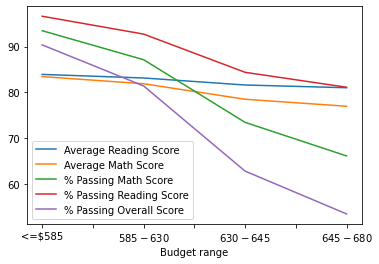

In [7]:

budget_bins = [0, 585, 630, 645, 680]
budget_labels = ["<=$585", "$585-$630", "$630-$645","$645-$680"]
#print(grouped_schools_summary_final_df)     
#grouped_schools_summary_final_df['Budget per student'] = grouped_schools_summary_final_df['Budget per student'].astype (float)
#grouped_schools_summary_final_df['Budget per student'].plot(kind="hist")


# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
grouped_schools_summary_final_df2=grouped_schools_summary_final_df
grouped_schools_summary_final_df2["Budget range"]=pd.cut(grouped_schools_summary_final_df["Budget per student"], budget_bins, labels=budget_labels)
#print(grouped_schools_summary_final_df2.head())
groupedBudgetPerStudent_df = grouped_schools_summary_final_df2.groupby(["Budget range"]).mean()
#print(groupedBudgetPerStudent_df.mean())
#print(len(groupedBudgetPerStudent_df))
#grouped_schools_summary_final_df
#print(len(groupedBudgetPerStudent_df))
groupedBudgetPerStudent_df=groupedBudgetPerStudent_df[["Average Reading Score","Average Math Score","% Passing Math Score","% Passing Reading Score","% Passing Overall Score"]]
groupedBudgetPerStudent_df.plot()
groupedBudgetPerStudent_df["Average Reading Score"]=groupedBudgetPerStudent_df["Average Reading Score"].apply(format2)
groupedBudgetPerStudent_df["Average Math Score"]=groupedBudgetPerStudent_df["Average Math Score"].apply(format2)
groupedBudgetPerStudent_df["% Passing Math Score"]=groupedBudgetPerStudent_df["% Passing Math Score"].apply(format2)
groupedBudgetPerStudent_df["% Passing Reading Score"]=groupedBudgetPerStudent_df["% Passing Reading Score"].apply(format2)
groupedBudgetPerStudent_df["% Passing Overall Score"]=groupedBudgetPerStudent_df["% Passing Overall Score"].apply(format2)
print(groupedBudgetPerStudent_df)


In [8]:

student_bins = [0,1000,2000,3000,4000,5000]
student_labels = ["<=1000", "1000-2000", "2000-3000","3000-4000","4000-5000"]
#print(grouped_schools_summary_final_df)     
#grouped_schools_summary_final_df['Budget per student'] = grouped_schools_summary_final_df['Budget per student'].astype (float)
#grouped_schools_summary_final_df['Budget per student'].plot(kind="hist")


# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
grouped_schools_summary_final_df2=grouped_schools_summary_final_df
grouped_schools_summary_final_df2["School Size"]=pd.cut(grouped_schools_summary_final_df["Total Students"], student_bins, labels=student_labels)
#print(grouped_schools_summary_final_df2.head())
groupedBudgetPerStudent_df = grouped_schools_summary_final_df2.groupby(["School Size"]).mean()
#print(groupedBudgetPerStudent_df.mean())
#print(len(groupedBudgetPerStudent_df))
#grouped_schools_summary_final_df
#print(len(groupedBudgetPerStudent_df))
groupedBudgetPerStudent_df=groupedBudgetPerStudent_df[["Average Reading Score","Average Math Score","% Passing Math Score","% Passing Reading Score","% Passing Overall Score"]]

groupedBudgetPerStudent_df["Average Reading Score"]=groupedBudgetPerStudent_df["Average Reading Score"].apply(format2)
groupedBudgetPerStudent_df["Average Math Score"]=groupedBudgetPerStudent_df["Average Math Score"].apply(format2)
groupedBudgetPerStudent_df["% Passing Math Score"]=groupedBudgetPerStudent_df["% Passing Math Score"].apply(format2)
groupedBudgetPerStudent_df["% Passing Reading Score"]=groupedBudgetPerStudent_df["% Passing Reading Score"].apply(format2)
groupedBudgetPerStudent_df["% Passing Overall Score"]=groupedBudgetPerStudent_df["% Passing Overall Score"].apply(format2)
print(groupedBudgetPerStudent_df)

            Average Reading Score Average Math Score % Passing Math Score  \
School Size                                                                 
<=1000                     83.93%             83.82%               93.55%   
1000-2000                  83.86%             83.37%               93.60%   
2000-3000                  81.77%             78.43%               73.46%   
3000-4000                  80.74%             76.84%               66.37%   
4000-5000                  80.98%             77.14%               66.50%   

            % Passing Reading Score % Passing Overall Score  
School Size                                                  
<=1000                       96.10%                  89.88%  
1000-2000                    96.79%                  90.62%  
2000-3000                    84.47%                  62.90%  
3000-4000                    80.22%                  52.99%  
4000-5000                    81.34%                  53.90%  


## Scores by School Type

* Perform the same operations as above, based on school type

            Average Reading Score Average Math Score % Passing Math Score  \
School Type                                                                 
Charter                    83.90%             83.47%               93.62%   
District                   80.97%             76.96%               66.55%   

            % Passing Reading Score % Passing Overall Score  
School Type                                                  
Charter                      96.59%                  90.43%  
District                     80.80%                  53.67%  


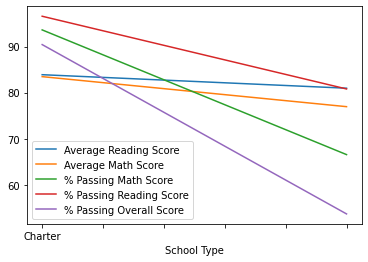

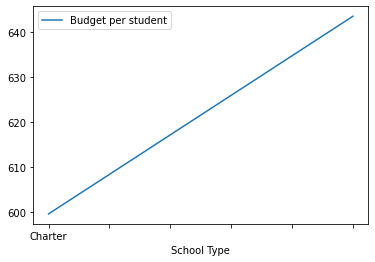

In [9]:
# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
grouped_schools_summary_final_df2=grouped_schools_summary_final_df
groupedBudgetPerStudent_df = grouped_schools_summary_final_df2.groupby(["School Type"]).mean()
groupedBudgetPerStudent_df=groupedBudgetPerStudent_df[["Average Reading Score","Average Math Score","% Passing Math Score","% Passing Reading Score","% Passing Overall Score"]]

groupedBudgetPerStudent_df["Average Reading Score"]=groupedBudgetPerStudent_df["Average Reading Score"].apply(format2)
groupedBudgetPerStudent_df["Average Math Score"]=groupedBudgetPerStudent_df["Average Math Score"].apply(format2)
groupedBudgetPerStudent_df["% Passing Math Score"]=groupedBudgetPerStudent_df["% Passing Math Score"].apply(format2)
groupedBudgetPerStudent_df["% Passing Reading Score"]=groupedBudgetPerStudent_df["% Passing Reading Score"].apply(format2)
groupedBudgetPerStudent_df["% Passing Overall Score"]=groupedBudgetPerStudent_df["% Passing Overall Score"].apply(format2)
print(groupedBudgetPerStudent_df)

#Additional investigation
groupedBudgetPerStudent_df1 = grouped_schools_summary_final_df2.groupby(["School Type"]).mean()
groupedBudgetPerStudent_df1=groupedBudgetPerStudent_df1[["Budget per student","Average Reading Score","Average Math Score","% Passing Math Score","% Passing Reading Score","% Passing Overall Score"]]
groupedBudgetPerStudent_df1[["Average Reading Score","Average Math Score","% Passing Math Score","% Passing Reading Score","% Passing Overall Score"]].plot()
groupedBudgetPerStudent_df1[["Budget per student"]].plot()

groupedBudgetPerStudent_df1["Average Reading Score"]=groupedBudgetPerStudent_df1["Average Reading Score"].apply(format2)
groupedBudgetPerStudent_df1["Average Math Score"]=groupedBudgetPerStudent_df1["Average Math Score"].apply(format2)
groupedBudgetPerStudent_df1["% Passing Math Score"]=groupedBudgetPerStudent_df1["% Passing Math Score"].apply(format2)
groupedBudgetPerStudent_df1["% Passing Reading Score"]=groupedBudgetPerStudent_df1["% Passing Reading Score"].apply(format2)
groupedBudgetPerStudent_df1["% Passing Overall Score"]=groupedBudgetPerStudent_df1["% Passing Overall Score"].apply(format2)